[Regression Colab](https://colab.research.google.com/drive/1BmOfFtpPD5lnRBiPJSPGVxtmfhz7MlQW#scrollTo=SSJmQqyHmnxv)

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

## Support Vector Regression (SVM)


Before regression, support vectors used in classification problems. 

We can use multiple lines passing from a point but we can't know what the slope is. By using support vectors we can select line with smallest margin.

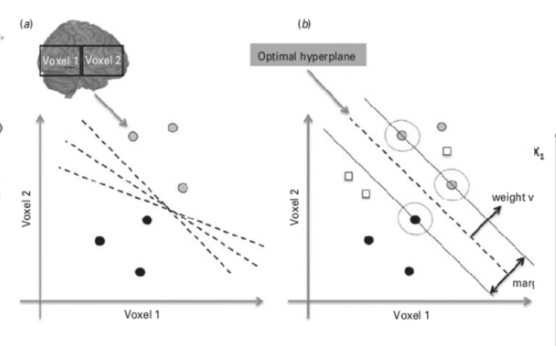

Support Vector Regression is vulnerable to outline datas! We have to use scaler to find best model.

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['maaslar.txt']))
print("Done")

In [ ]:
x = data.iloc[:,1:2]
y = data.iloc[:,2:]
X = x.values
Y = y.values

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.01150915]
[0.01150915]
0.7513836788854973


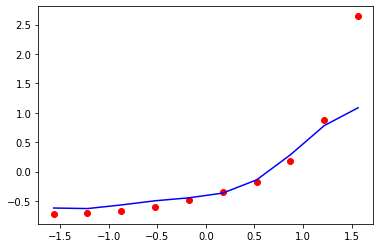

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_scaled = sc1.fit_transform(X)
sc2 = StandardScaler()
y_scaled = sc2.fit_transform(Y)

from sklearn.svm import SVR
# Also there is linear and poly for kernel
# rbf = radial basis function. 

svr_reg = SVR(kernel='rbf')  
svr_reg.fit(x_scaled, y_scaled)

plt.scatter(x_scaled, y_scaled, color='red')
plt.plot(x_scaled, svr_reg.predict(x_scaled), color='blue')

# gives scaled predictions:
print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))

# r^2 value for SVM
print("SVM R2 VALUE:")
print(r2_score(y_scaled, svr_reg.predict(x_scaled)))

# Prediction Using Decision Tree

Main usage is classification though it can still be used for prediction. 

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['maaslar.txt']))
print("Done")

x = data.iloc[:,1:2]
y = data.iloc[:,2:]
X = x.values
Y = y.values
print("Numpy arrays are set.")

Saving maaslar.txt to maaslar.txt
Done
Numpy arrays are set.


[10000.]
[50000.]
DECISION TREE R2 VALUE:
1.0


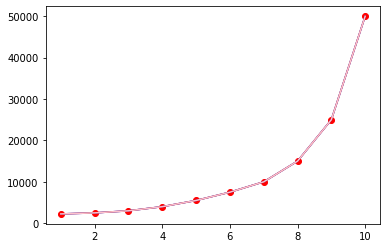

In [ ]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X, Y)
# by using 2 new values Z and K to test tree:
Z = X + 0.5
K = X - 0.4

plt.scatter(X, Y, color='red')
plt.plot(X, r_dt.predict(X), color='blue')

plt.plot(X, r_dt.predict(Z), color='brown')
plt.plot(X, r_dt.predict(K), color='pink')
# We can see that Z and K predictions are same because it's been 
# quantized to same group, decision tree can't give different results then
# borders.

print(r_dt.predict([[6.6]]))
print(r_dt.predict([[11]]))

# r^2 value for decision tree
print("DECISION TREE R2 VALUE:")
print(r2_score(Y, r_dt.predict(X)))
# r2 value will be 1,
# for decision tree r^2 will be wrong algorithm to eveluate success!

# Random Forest

It's a different algorithm that uses multiple decision tree. *According to Sadi Evren Şeker, with experience, random forest outperforms decision tree in the field. Because decision tree tend to give results that we give to train model.*

For classification, we use majority vote. Each decision tree has its own output. We choose the most frequent.

For prediction, we take the mean of all the decision trees' output.

**Note: Too much data is a bad thing for decision tree. It causes overfitting and increase calculation time. (It'll memorize data.) By giving less data, we encourage algorithm to create more decision tree. More decision tree can be considered like more person giving his/her opinion about a subject.**

---

Ensemble Learning:

We can use multiple algorithms at the same time then sum them up for stronger prediction or classification.

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['maaslar.txt']))
print("Done")

Saving maaslar.txt to maaslar.txt
Done


In [ ]:
x = data.iloc[:,1:2]
y = data.iloc[:,2:]
X = x.values
Y = y.values
print("Numpy arrays are set.")

Numpy arrays are set.


[10500.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


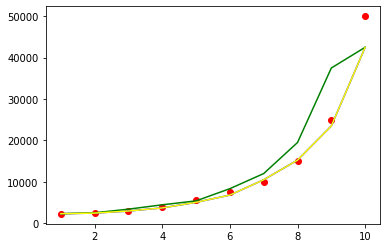

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# n_estimators selects how many decision tree will be used.
rf_reg = RandomForestRegressor(n_estimators = 10, random_state=0)
rf_reg.fit(X, Y)
Z = X + 0.5
K = X - 0.4

print(rf_reg.predict([[6.6]]))

plt.scatter(X, Y, color='red')
plt.plot(X, rf_reg.predict(X), color='blue')

plt.plot(X, rf_reg.predict(Z), color='green')
plt.plot(X, rf_reg.predict(K), color='yellow')

# Comparing Prediction Algorithms

R^2 ---> 0 is the worst prediction result. Negative **even** worse. Higher the R^2 is the better. In this case 1 means **perfect** prediction.

---

Adjusted R^2 ---> In multivariable regression, when we add new variable to improve our model, R^2 value will **NEVER** decrease.

---

In [ ]:
# use values calculated and used in Random Forest part
from sklearn.metrics import r2_score
# first argument is real values, second is prediction
print(r2_score(Y, rf_reg.predict(X)))

0.9704434230386582
